<a href="https://colab.research.google.com/github/didiercsgm/THC/blob/main/Proyecto_Ebola_Didier_Dulce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Aquí importamos las librerías que vamos a usar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#También importamos la base de datos que vamps a usar
link="https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"
code="?raw=true"
url=link+code
df = pd.read_csv(url,sep=",",index_col=1)

df.isnull().sum()

#Isolamos los datos de españa, para poder analizarlos independientemente
spain=df[df["Country"]=="Spain"]

spain = spain.drop("Country", axis=1)

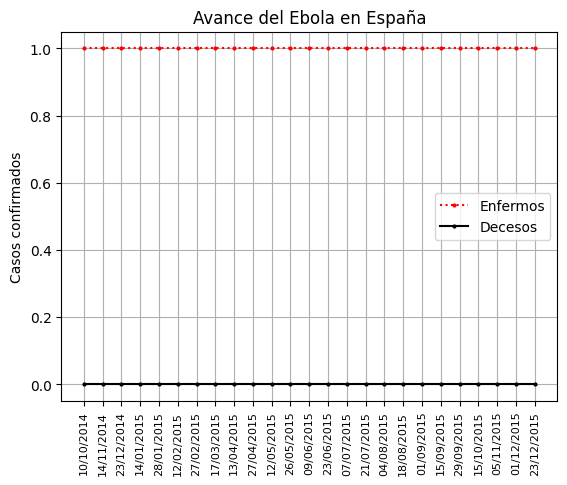

In [64]:
#graficamos el avance del ebola en españa
NCC=spain["No. of confirmed cases"][0:-1:10]
NCD=spain["No. of confirmed deaths"][0:-1:10]
Dates=spain.index[0:-1:10]

#datos de la gráfica
plt.plot(Dates,NCC,"o:r",ms=2,label="Enfermos")
plt.plot(Dates,NCD,"o-k",ms=2,label="Decesos")
plt.grid()
plt.title("Avance del Ebola en España")
plt.ylabel("Casos confirmados")
plt.legend()
plt.xticks(rotation=90,fontsize=8)
plt.show()

recuperados = 0

<ipython-input-65-b9cb8e97c87c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index = pd.to_datetime(df.index)
<ipython-input-65-b9cb8e97c87c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mundo = df.groupby(df.index)["No. of confirmed cases", "No. of confirmed deaths"].sum()


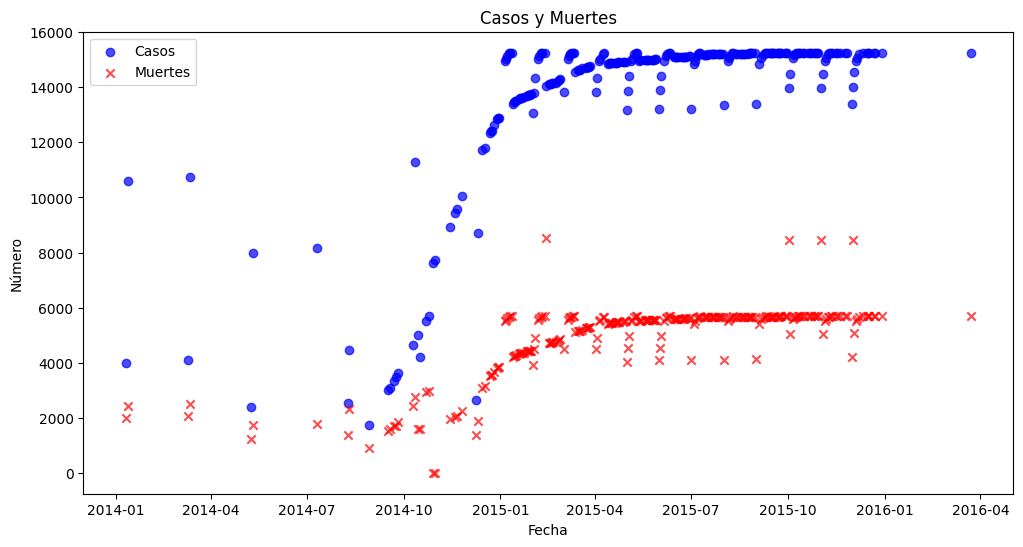

In [65]:
#nos aseguramos que los datos esten en orden para poder graficar bien.
df.index = pd.to_datetime(df.index)

mundo = df.groupby(df.index)["No. of confirmed cases", "No. of confirmed deaths"].sum()

mundo = mundo.sort_index()

#datos de la gráfica, casos totales y muertes totales en el mundo
plt.figure(figsize=(12, 6))
plt.scatter(mundo.index, mundo["No. of confirmed cases"], label="Casos", marker="o", color="blue", alpha=0.7)
plt.scatter(mundo.index, mundo["No. of confirmed deaths"], label="Muertes", marker="x", color="red", alpha=0.7)

plt.title("Casos y Muertes")
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.legend()
plt.show()


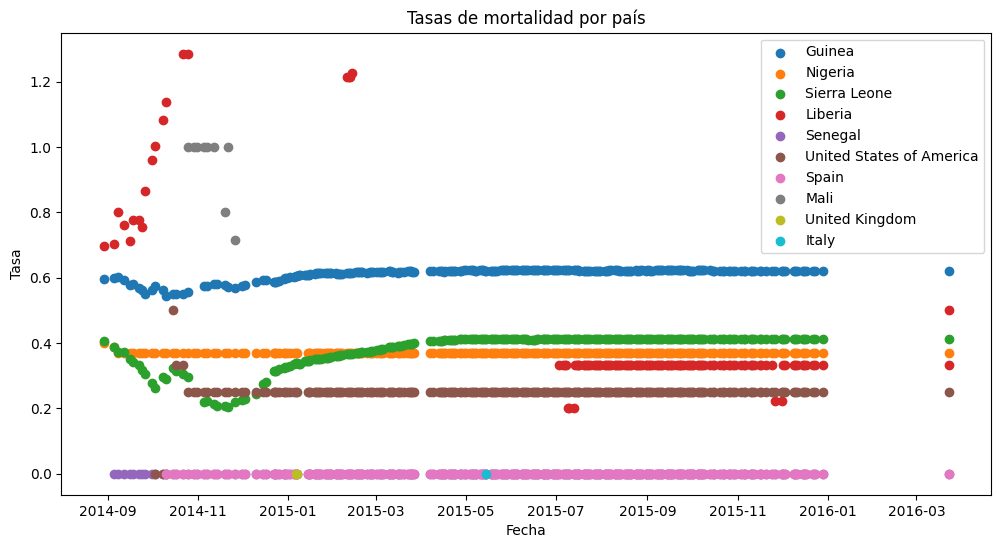

In [66]:
#volvemos a ordenar a los datos para poder definir una tasa de mortalidad
url = "https://raw.githubusercontent.com/seismomat/HerramientasComputacionales/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv"
df = pd.read_csv(url, parse_dates=["Date"], dayfirst=True)
df.set_index("Date", inplace=True)

#definimos una tasa de mortalidad
df["tasa"] = df["No. of confirmed deaths"] / df["No. of confirmed cases"]

#datos de la gráfica, tasa de mortalidad por país
plt.figure(figsize=(12, 6))
#bucle para graficar varios países de diferentes colores
for country in df["Country"].unique():
    country_df = df[df["Country"] == country]
    plt.scatter(country_df.index, country_df["tasa"], label=country, marker="o")

plt.title("Tasas de mortalidad por país")
plt.xlabel("Fecha")
plt.ylabel("Tasa")
plt.legend()
plt.show()


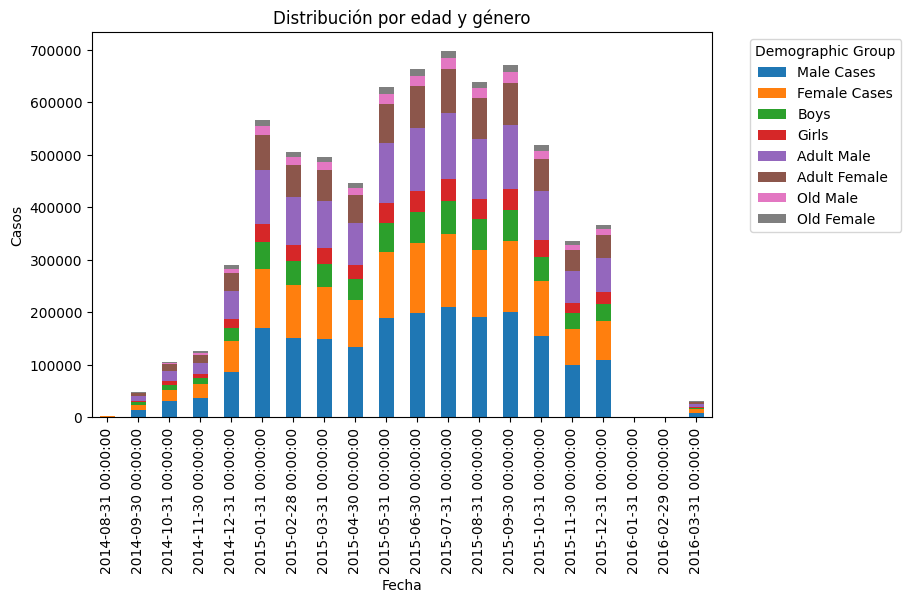

In [67]:
#definimos un sub-grupo de los datos para analizar la distribución demográfica
demo = ["Male Cases", "Female Cases", "Boys", "Girls", "Adult Male", "Adult Female", "Old Male", "Old Female"]

ds = df[demo].resample("1M").sum()

mvs = ds.isnull().sum()

#datos de la gráfica
ax = ds.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Distribución por edad y género")
plt.xlabel("Fecha")
plt.ylabel("Casos")

ax.legend(title="Demographic Group", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


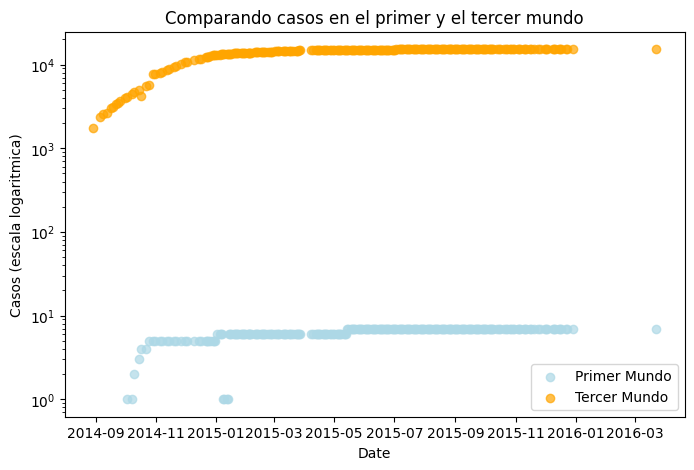

In [68]:
#hacemos una separación entre primer y tercer
df["cat"] = df["Country"].apply(lambda x: "Primer Mundo" if x in ["Italy", "Spain", "United States of America", "United Kingdom"] else "Tercer Mundo")

primerotercer = df.groupby(["Date", "cat"])["No. of confirmed cases"].sum().unstack().reset_index()

#graficamos diferencia entre primer y tercer mundo
plt.figure(figsize=(8, 5))
plt.scatter(primerotercer["Date"], primerotercer["Primer Mundo"], label="Primer Mundo", color="lightblue", alpha=0.7)
plt.scatter(primerotercer["Date"], primerotercer["Tercer Mundo"], label="Tercer Mundo", color="orange", alpha=0.7)

plt.title("Comparando casos en el primer y el tercer mundo")
plt.xlabel("Date")
plt.ylabel("Casos (escala logaritmica)")
plt.yscale("log")
plt.legend()
plt.show()


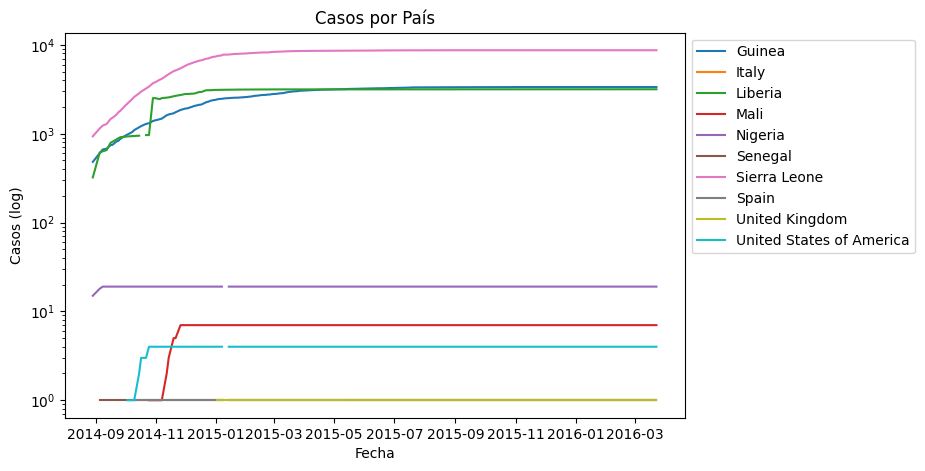

In [69]:
#hacemos separación entre países para poder graficarlos por separado
paises = df.pivot_table(index="Date", columns="Country", values="No. of confirmed cases", aggfunc="sum")

plt.figure(figsize=(8, 5))
#bucle para graficar cada país individualmente
for country in paises.columns:
    plt.plot(paises.index, paises[country], label=country)

#datos de la gráfica
plt.title("Casos por País")
plt.xlabel("Fecha")
plt.ylabel("Casos (log)")
plt.yscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()
